In [1]:
import mediapipe

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

# To check TensorFlow-GPU version
print("TensorFlow-GPU version:", tf.version.VERSION)

TensorFlow version: 2.4.1
TensorFlow-GPU version: 2.4.1


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
from mediapipe.python.solutions import face_mesh
def draw_landmarks(image,results):
    #mp_drawing.draw_landmarks(image,results.face_landmarks,face_mesh.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [5]:
cap = cv2.VideoCapture(0)
# Setting mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image,results=mediapipe_detection(frame,holistic)
        print(results)

        draw_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
len(results.left_hand_landmarks.landmark)

21

In [7]:
draw_landmarks(frame,results)

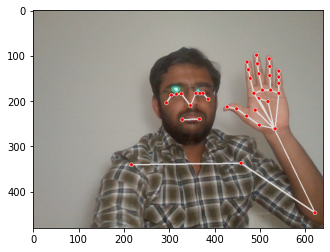

In [8]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,lh,rh])

In [11]:
result=extract_keypoints(results)
result

array([ 5.43348670e-01,  4.38544482e-01, -9.51906562e-01,  9.99822378e-01,
        5.60971260e-01,  3.81311208e-01, -8.83769691e-01,  9.99598444e-01,
        5.75239658e-01,  3.81331146e-01, -8.83950889e-01,  9.99706209e-01,
        5.86774230e-01,  3.81566525e-01, -8.83866668e-01,  9.99597907e-01,
        5.11130512e-01,  3.84431720e-01, -9.04197335e-01,  9.99540687e-01,
        4.93990839e-01,  3.86997551e-01, -9.03683007e-01,  9.99584198e-01,
        4.77887243e-01,  3.91499847e-01, -9.04127896e-01,  9.99421954e-01,
        6.03322864e-01,  4.08889413e-01, -4.64744002e-01,  9.99680161e-01,
        4.59472984e-01,  4.27082717e-01, -5.36371827e-01,  9.99783516e-01,
        5.73635519e-01,  5.00720441e-01, -7.91797519e-01,  9.99848843e-01,
        5.14348984e-01,  5.03789127e-01, -8.16546082e-01,  9.99875665e-01,
        7.17581868e-01,  7.02689171e-01, -1.63760319e-01,  9.99629021e-01,
        3.39721650e-01,  7.09022641e-01, -2.34000236e-01,  9.95799422e-01,
        9.72627163e-01,  

In [12]:
np.save('1',result)

In [13]:
notebook_path = os.path.abspath("")

In [14]:
DATA_PATH=os.path.join(notebook_path,'575_project_input_data')
alphabets=np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9'])
no_of_videos_alphabet=30
no_of_frames_video_alphabet=30

In [16]:
for alphabet in alphabets: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, alphabet))).astype(int))
    for video_no in range(1,no_of_videos_alphabet+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, alphabet, str(video_no)))
        except:
            pass


In [51]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    

    for alphabet in alphabets:
        for video_no in range(1,no_of_videos_alphabet+1):
            for frame_num in range(1,no_of_frames_video_alphabet+1):

                # Read feed
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_landmarks(image, results)

                if frame_num == 1: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(alphabet, video_no), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(alphabet, video_no), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,alphabet,str(video_no),str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [21]:
#So now completed collecting data
#Now categorize and segregate the data

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
labels_for_alphabets = {label:num for num, label in enumerate(alphabets)}

In [21]:
labels_for_alphabets

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 '0': 26,
 '1': 27,
 '2': 28,
 '3': 29,
 '4': 30,
 '5': 31,
 '6': 32,
 '7': 33,
 '8': 34,
 '9': 35}

In [23]:
alphabets_data, labels = [], []
for alphabet in alphabets:
    for video_values in np.array(os.listdir(os.path.join(DATA_PATH, alphabet))).astype(int):
        window = []
        for frame_num in range(1,no_of_frames_video_alphabet+1):
            res = np.load(os.path.join(DATA_PATH, alphabet, str(video_values), "{}.npy".format(frame_num)))
            window.append(res)
        alphabets_data.append(window)
        labels.append(labels_for_alphabets[alphabet])

In [25]:
X=np.array(alphabets_data)
X.shape

(1080, 30, 258)

In [26]:
np.array(labels).shape

(1080,)

In [58]:
y=to_categorical(labels).astype(int)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(864, 30, 258)
(216, 30, 258)
(864, 36)
(216, 36)


In [61]:
# Categorizing ipoyindhi, next neural network ni train

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [63]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(alphabets.shape[0], activation='softmax'))

In [64]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
27/27 [==============================] - 3s 36ms/step - loss: 3.6027 - categorical_accuracy: 0.0372
Epoch 2/500
27/27 [==============================] - 1s 36ms/step - loss: 3.5580 - categorical_accuracy: 0.0564
Epoch 3/500
27/27 [==============================] - 1s 36ms/step - loss: 3.5697 - categorical_accuracy: 0.0360
Epoch 4/500
27/27 [==============================] - 1s 36ms/step - loss: 3.5384 - categorical_accuracy: 0.0797
Epoch 5/500
27/27 [==============================] - 1s 37ms/step - loss: 3.4600 - categorical_accuracy: 0.0549
Epoch 6/500
27/27 [==============================] - 1s 49ms/step - loss: 3.5292 - categorical_accuracy: 0.0639
Epoch 7/500
27/27 [==============================] - 2s 71ms/step - loss: 3.4108 - categorical_accuracy: 0.0756
Epoch 8/500
27/27 [==============================] - 2s 70ms/step - loss: 3.3227 - categorical_accuracy: 0.0932
Epoch 9/500
27/27 [==============================] - 2s 69ms/step - loss: 3.3257 - categorical_accuracy:

27/27 [==============================] - 2s 84ms/step - loss: 2.3262 - categorical_accuracy: 0.7122
Epoch 74/500
27/27 [==============================] - 2s 69ms/step - loss: 1.8322 - categorical_accuracy: 0.4121
Epoch 75/500
27/27 [==============================] - 2s 75ms/step - loss: 1.1417 - categorical_accuracy: 0.6171
Epoch 76/500
27/27 [==============================] - 2s 80ms/step - loss: 0.9046 - categorical_accuracy: 0.7087
Epoch 77/500
27/27 [==============================] - 2s 69ms/step - loss: 0.8481 - categorical_accuracy: 0.6901
Epoch 78/500
27/27 [==============================] - 2s 69ms/step - loss: 0.7126 - categorical_accuracy: 0.7531
Epoch 79/500
27/27 [==============================] - 2s 78ms/step - loss: 0.7326 - categorical_accuracy: 0.7473
Epoch 80/500
27/27 [==============================] - 2s 70ms/step - loss: 0.6011 - categorical_accuracy: 0.7935
Epoch 81/500
27/27 [==============================] - 2s 73ms/step - loss: 0.8700 - categorical_accuracy: 0.7

27/27 [==============================] - 2s 74ms/step - loss: 2.1296 - categorical_accuracy: 0.3279
Epoch 145/500
27/27 [==============================] - 2s 73ms/step - loss: 2.0687 - categorical_accuracy: 0.3471
Epoch 146/500
27/27 [==============================] - 2s 74ms/step - loss: 2.0975 - categorical_accuracy: 0.3430
Epoch 147/500
27/27 [==============================] - 2s 75ms/step - loss: 2.0921 - categorical_accuracy: 0.3101
Epoch 148/500
27/27 [==============================] - 2s 70ms/step - loss: 2.1415 - categorical_accuracy: 0.3386
Epoch 149/500
27/27 [==============================] - 2s 72ms/step - loss: 1.9952 - categorical_accuracy: 0.3840
Epoch 150/500
27/27 [==============================] - 2s 71ms/step - loss: 2.0905 - categorical_accuracy: 0.3196
Epoch 151/500
27/27 [==============================] - 2s 71ms/step - loss: 1.9568 - categorical_accuracy: 0.3471 1s - los
Epoch 152/500
27/27 [==============================] - 2s 71ms/step - loss: 2.0739 - categori

27/27 [==============================] - 2s 87ms/step - loss: 1.0006 - categorical_accuracy: 0.6541
Epoch 216/500
27/27 [==============================] - 2s 79ms/step - loss: 1.0655 - categorical_accuracy: 0.6088
Epoch 217/500
27/27 [==============================] - 2s 87ms/step - loss: 1.0307 - categorical_accuracy: 0.6252
Epoch 218/500
27/27 [==============================] - 2s 66ms/step - loss: 0.9192 - categorical_accuracy: 0.6657
Epoch 219/500
27/27 [==============================] - 2s 71ms/step - loss: 0.9556 - categorical_accuracy: 0.6491
Epoch 220/500
27/27 [==============================] - 2s 72ms/step - loss: 0.9890 - categorical_accuracy: 0.6424
Epoch 221/500
27/27 [==============================] - 2s 71ms/step - loss: 0.8475 - categorical_accuracy: 0.7021
Epoch 222/500
27/27 [==============================] - 2s 65ms/step - loss: 0.9305 - categorical_accuracy: 0.6898
Epoch 223/500
27/27 [==============================] - 2s 64ms/step - loss: 0.9486 - categorical_accur

27/27 [==============================] - 3s 96ms/step - loss: 0.6612 - categorical_accuracy: 0.7749
Epoch 287/500
27/27 [==============================] - 2s 84ms/step - loss: 0.6425 - categorical_accuracy: 0.7546
Epoch 288/500
27/27 [==============================] - 2s 80ms/step - loss: 0.6744 - categorical_accuracy: 0.7488
Epoch 289/500
27/27 [==============================] - 2s 67ms/step - loss: 0.6093 - categorical_accuracy: 0.7690
Epoch 290/500
27/27 [==============================] - 2s 66ms/step - loss: 0.6212 - categorical_accuracy: 0.7749
Epoch 291/500
27/27 [==============================] - 2s 70ms/step - loss: 0.7488 - categorical_accuracy: 0.7419
Epoch 292/500
27/27 [==============================] - 2s 76ms/step - loss: 0.8282 - categorical_accuracy: 0.7465
Epoch 293/500
27/27 [==============================] - 2s 83ms/step - loss: 0.9660 - categorical_accuracy: 0.6211
Epoch 294/500
27/27 [==============================] - 2s 79ms/step - loss: 0.6371 - categorical_accur

In [ ]:
model.summary()

In [31]:
#now do prediction

In [32]:
res=model.predict(X_test)
print(res)

[[4.0415803e-22 2.1776540e-19 7.1247004e-31 ... 1.8342619e-15
  2.9979305e-05 7.2435213e-10]
 [1.0474341e-16 3.3762260e-10 1.0349751e-07 ... 4.8303651e-04
  2.2077468e-01 7.3042148e-01]
 [1.4458823e-18 1.4860506e-08 3.5936868e-08 ... 1.4865760e-33
  6.2222583e-15 2.4339315e-22]
 ...
 [1.5050146e-10 1.9567774e-11 4.2664086e-09 ... 6.0583593e-04
  2.1843605e-06 4.4802132e-06]
 [1.9950995e-03 7.3039837e-07 4.7192077e-07 ... 6.8109126e-05
  2.3347907e-08 9.5106673e-11]
 [6.9734862e-24 2.2715572e-05 1.9408131e-19 ... 8.2453264e-14
  9.8886943e-14 1.3107387e-17]]


In [33]:
np.argmax(res)

7180

In [34]:
for i in range(len(res)):
    print(i,alphabets[np.argmax(res[i])])

0 1
1 9
2 D
3 3
4 S
5 1
6 U
7 B
8 0
9 H
10 M
11 T
12 X
13 I
14 V
15 K
16 Z
17 5
18 2
19 5
20 5
21 4
22 2
23 7
24 S
25 A
26 N
27 3
28 I
29 F
30 H
31 X
32 9
33 X
34 1
35 P
36 K
37 0
38 4
39 4
40 H
41 1
42 N
43 X
44 T
45 T
46 X
47 S
48 6
49 0
50 8
51 H
52 V
53 H
54 K
55 S
56 U
57 T
58 N
59 I
60 O
61 D
62 J
63 Y
64 7
65 8
66 J
67 8
68 9
69 V
70 Q
71 2
72 B
73 R
74 I
75 V
76 E
77 4
78 K
79 O
80 B
81 Z
82 S
83 H
84 J
85 J
86 E
87 B
88 C
89 9
90 F
91 M
92 I
93 A
94 G
95 C
96 W
97 V
98 B
99 X
100 0
101 O
102 9
103 U
104 3
105 M
106 5
107 A
108 G
109 W
110 V
111 Q
112 D
113 O
114 V
115 W
116 8
117 5
118 P
119 J
120 A
121 L
122 2
123 Y
124 2
125 P
126 5
127 H
128 1
129 3
130 H
131 5
132 1
133 B
134 6
135 B
136 L
137 Y
138 7
139 X
140 A
141 X
142 3
143 P
144 J
145 3
146 E
147 9
148 W
149 9
150 F
151 H
152 A
153 1
154 W
155 H
156 7
157 B
158 G
159 0
160 Z
161 K
162 4
163 Y
164 V
165 3
166 E
167 F
168 P
169 P
170 F
171 8
172 I
173 W
174 H
175 I
176 O
177 H
178 P
179 Z
180 Q
181 8
182 D
183 0
184 N


In [35]:
for i in range(len(res)):
    print(i,alphabets[np.argmax(y_test[i])])

0 1
1 8
2 D
3 3
4 Z
5 1
6 U
7 B
8 0
9 H
10 M
11 7
12 X
13 I
14 V
15 K
16 Z
17 5
18 E
19 5
20 5
21 4
22 2
23 7
24 S
25 A
26 N
27 3
28 I
29 F
30 H
31 X
32 9
33 E
34 1
35 P
36 K
37 0
38 4
39 4
40 H
41 1
42 N
43 X
44 7
45 T
46 X
47 7
48 6
49 0
50 8
51 C
52 8
53 H
54 K
55 S
56 U
57 T
58 N
59 I
60 O
61 D
62 J
63 Y
64 7
65 7
66 J
67 8
68 9
69 V
70 Q
71 2
72 B
73 3
74 I
75 V
76 E
77 4
78 J
79 O
80 B
81 Z
82 S
83 H
84 J
85 J
86 E
87 B
88 H
89 8
90 F
91 M
92 I
93 A
94 G
95 C
96 W
97 V
98 B
99 A
100 0
101 O
102 9
103 U
104 3
105 M
106 5
107 A
108 G
109 W
110 3
111 Q
112 D
113 O
114 V
115 W
116 9
117 5
118 C
119 J
120 A
121 L
122 2
123 Y
124 2
125 C
126 4
127 H
128 1
129 3
130 H
131 5
132 1
133 C
134 6
135 B
136 L
137 Y
138 U
139 L
140 A
141 X
142 3
143 P
144 J
145 3
146 E
147 9
148 W
149 9
150 F
151 H
152 A
153 1
154 W
155 H
156 7
157 W
158 G
159 0
160 Z
161 J
162 4
163 Y
164 V
165 3
166 E
167 F
168 P
169 P
170 F
171 S
172 I
173 V
174 H
175 I
176 C
177 H
178 P
179 Z
180 Y
181 8
182 D
183 0
184 N


In [36]:
model.save('sign_language_interpreter.h5')

In [37]:
X_test.shape

(216, 30, 258)

In [41]:
sequence = []
sentence = []
predictions = []
threshold = 0.3
i=0

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
        print(len(sequence))
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            x=alphabets[np.argmax(res)]
            if(len(sentence)>1):
                if(sentence[len(sentence)-1]!=x):
                    sentence.append(x)
                    i+=1
            else:
                sentence.append(x)
                i+=1
                
            print(x)
            del sequence[0:30]
            #predictions.append(np.argmax(res))
            
            
        #3. Viz logic
        #if np.unique(predictions[-10:])[0]==np.argmax(res): 
        """"if res[np.argmax(res)] > threshold: 

            if len(sentence) > 0: 
                if alphabets[np.argmax(res)] != sentence[-1]:
                    sentence.append(alphabets[np.argmax(res)])
            else:
                sentence.append(alphabets[np.argmax(res)])

        if len(sentence) > 5: 
            sentence = sentence[-5:]"""


        if(len(sentence)>0):    
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ''.join(sentence[i-1]), (3,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
X
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.Sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.Solu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.Solu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.Sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
Y
<class 'mediapipe.python.solution_base

3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.Solut

<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
Y
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.Solutio

<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
Y
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.Soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.Solution

13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.Sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.Sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
Q
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
T
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.Solut

<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.S

28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.Solut

<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.S

KeyboardInterrupt: 

In [52]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
DATA_PATH2=os.path.join(notebook_path,'575_project_input_word_data')
words=np.array(["ILoveYou","Thanks","Hello","Sorry","What"])
no_of_videos_words=30
no_of_frames_video_word=3

In [ ]:
for word in words: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, alphabet))).astype(int))
    for video_no in range(1,no_of_videos_words+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH2, word, str(video_no)))
        except:
            pass

In [33]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    

    for word in words:
        for video_no in range(1,no_of_videos_words+1):
            for frame_num in range(1,no_of_frames_video_word+1):

                # Read feed
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_landmarks(image, results)

                if frame_num == 1: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(word, video_no), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(word, video_no), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH2,word,str(video_no),str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'sequence' is not defined

In [ ]:
labels_for_words = {label:num for num, label in enumerate(words)}
labels_for_words

In [ ]:
words_data, labels2 = [], []
for word in words:
    for video_values in np.array(os.listdir(os.path.join(DATA_PATH2, word))).astype(int):
        window = []
        for frame_num in range(1,no_of_frames_video_word+1):
            res = np.load(os.path.join(DATA_PATH2, word, str(video_values), "{}.npy".format(frame_num)))
            window.append(res)
        words_data.append(window)
        labels2.append(labels_for_words[word])

In [36]:
X1=np.array(words_data)
X1.shape

(150, 30, 258)

In [37]:
np.array(labels2).shape

(150,)

In [38]:
y1=to_categorical(labels2).astype(int)
y1[26]

array([1, 0, 0, 0, 0])

In [49]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model1 = Sequential()
model1.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model1.add(LSTM(128, return_sequences=True, activation='relu'))
model1.add(LSTM(64, return_sequences=False, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(words.shape[0], activation='softmax'))

In [51]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [52]:
model1.fit(X1_train, y1_train, epochs=500)

Epoch 1/500
4/4 [==============================] - 3s 51ms/step - loss: 1.6117 - categorical_accuracy: 0.2160
Epoch 2/500
4/4 [==============================] - 0s 46ms/step - loss: 1.4388 - categorical_accuracy: 0.4081
Epoch 3/500
4/4 [==============================] - 0s 44ms/step - loss: 0.9996 - categorical_accuracy: 0.6031
Epoch 4/500
4/4 [==============================] - 0s 44ms/step - loss: 0.8908 - categorical_accuracy: 0.6327
Epoch 5/500
4/4 [==============================] - 0s 44ms/step - loss: 0.7001 - categorical_accuracy: 0.6804
Epoch 6/500
4/4 [==============================] - 0s 45ms/step - loss: 0.9188 - categorical_accuracy: 0.5369
Epoch 7/500
4/4 [==============================] - 0s 44ms/step - loss: 0.8428 - categorical_accuracy: 0.6242
Epoch 8/500
4/4 [==============================] - 0s 53ms/step - loss: 0.8679 - categorical_accuracy: 0.6848
Epoch 9/500
4/4 [==============================] - 0s 50ms/step - loss: 0.8392 - categorical_accuracy: 0.6844
Epoch 10/5

4/4 [==============================] - 0s 111ms/step - loss: 0.9902 - categorical_accuracy: 0.4875
Epoch 75/500
4/4 [==============================] - 0s 97ms/step - loss: 0.8863 - categorical_accuracy: 0.5892
Epoch 76/500
4/4 [==============================] - 0s 117ms/step - loss: 0.9265 - categorical_accuracy: 0.6817
Epoch 77/500
4/4 [==============================] - 0s 111ms/step - loss: 0.9184 - categorical_accuracy: 0.6431
Epoch 78/500
4/4 [==============================] - 0s 103ms/step - loss: 0.7876 - categorical_accuracy: 0.7100
Epoch 79/500
4/4 [==============================] - 0s 111ms/step - loss: 0.7681 - categorical_accuracy: 0.6475
Epoch 80/500
4/4 [==============================] - 0s 94ms/step - loss: 0.6650 - categorical_accuracy: 0.6621
Epoch 81/500
4/4 [==============================] - 0s 105ms/step - loss: 0.5633 - categorical_accuracy: 0.7156
Epoch 82/500
4/4 [==============================] - 0s 97ms/step - loss: 0.5730 - categorical_accuracy: 0.6773
Epoch 83

4/4 [==============================] - 0s 91ms/step - loss: 0.1286 - categorical_accuracy: 0.9335
Epoch 147/500
4/4 [==============================] - 0s 92ms/step - loss: 0.1511 - categorical_accuracy: 0.9231
Epoch 148/500
4/4 [==============================] - 0s 90ms/step - loss: 0.1511 - categorical_accuracy: 0.9158
Epoch 149/500
4/4 [==============================] - 0s 94ms/step - loss: 0.1319 - categorical_accuracy: 0.9535
Epoch 150/500
4/4 [==============================] - 0s 94ms/step - loss: 0.1126 - categorical_accuracy: 0.9248
Epoch 151/500
4/4 [==============================] - 0s 99ms/step - loss: 0.1430 - categorical_accuracy: 0.8979
Epoch 152/500
4/4 [==============================] - 0s 94ms/step - loss: 0.1080 - categorical_accuracy: 0.9477
Epoch 153/500
4/4 [==============================] - 0s 84ms/step - loss: 0.0974 - categorical_accuracy: 0.9742
Epoch 154/500
4/4 [==============================] - 0s 86ms/step - loss: 0.0679 - categorical_accuracy: 0.9765
Epoch 

4/4 [==============================] - 0s 93ms/step - loss: 0.0698 - categorical_accuracy: 0.9637
Epoch 220/500
4/4 [==============================] - 0s 100ms/step - loss: 0.0321 - categorical_accuracy: 0.9933
Epoch 221/500
4/4 [==============================] - 0s 98ms/step - loss: 0.0400 - categorical_accuracy: 0.9806
Epoch 222/500
4/4 [==============================] - 0s 100ms/step - loss: 0.0359 - categorical_accuracy: 0.9852
Epoch 223/500
4/4 [==============================] - 0s 100ms/step - loss: 0.0148 - categorical_accuracy: 1.0000
Epoch 224/500
4/4 [==============================] - 0s 90ms/step - loss: 0.0260 - categorical_accuracy: 0.9852
Epoch 225/500
4/4 [==============================] - 0s 94ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 226/500
4/4 [==============================] - 0s 89ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 227/500
4/4 [==============================] - 0s 89ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epo

4/4 [==============================] - 0s 86ms/step - loss: 6.0464e-05 - categorical_accuracy: 1.0000
Epoch 291/500
4/4 [==============================] - 0s 84ms/step - loss: 5.9812e-05 - categorical_accuracy: 1.0000
Epoch 292/500
4/4 [==============================] - 0s 74ms/step - loss: 6.5253e-05 - categorical_accuracy: 1.0000
Epoch 293/500
4/4 [==============================] - 0s 82ms/step - loss: 6.1063e-05 - categorical_accuracy: 1.0000
Epoch 294/500
4/4 [==============================] - 0s 77ms/step - loss: 8.0202e-05 - categorical_accuracy: 1.0000
Epoch 295/500
4/4 [==============================] - 0s 84ms/step - loss: 6.1454e-05 - categorical_accuracy: 1.0000
Epoch 296/500
4/4 [==============================] - 0s 75ms/step - loss: 6.8005e-05 - categorical_accuracy: 1.0000
Epoch 297/500
4/4 [==============================] - 0s 81ms/step - loss: 5.8007e-05 - categorical_accuracy: 1.0000
Epoch 298/500
4/4 [==============================] - 0s 76ms/step - loss: 6.2719e-05 -

4/4 [==============================] - 0s 90ms/step - loss: 2.9618e-05 - categorical_accuracy: 1.0000
Epoch 361/500
4/4 [==============================] - 0s 108ms/step - loss: 2.8626e-05 - categorical_accuracy: 1.0000
Epoch 362/500
4/4 [==============================] - 0s 88ms/step - loss: 3.1964e-05 - categorical_accuracy: 1.0000
Epoch 363/500
4/4 [==============================] - 0s 85ms/step - loss: 2.6671e-05 - categorical_accuracy: 1.0000
Epoch 364/500
4/4 [==============================] - 0s 84ms/step - loss: 2.9992e-05 - categorical_accuracy: 1.0000
Epoch 365/500
4/4 [==============================] - 0s 80ms/step - loss: 3.2127e-05 - categorical_accuracy: 1.0000
Epoch 366/500
4/4 [==============================] - 0s 91ms/step - loss: 2.6887e-05 - categorical_accuracy: 1.0000
Epoch 367/500
4/4 [==============================] - 0s 89ms/step - loss: 1.9977e-05 - categorical_accuracy: 1.0000
Epoch 368/500
4/4 [==============================] - 0s 89ms/step - loss: 2.6770e-05 

4/4 [==============================] - 0s 91ms/step - loss: 2.0637e-05 - categorical_accuracy: 1.0000
Epoch 431/500
4/4 [==============================] - 0s 85ms/step - loss: 1.7640e-05 - categorical_accuracy: 1.0000
Epoch 432/500
4/4 [==============================] - 0s 81ms/step - loss: 1.8747e-05 - categorical_accuracy: 1.0000
Epoch 433/500
4/4 [==============================] - 0s 83ms/step - loss: 1.6556e-05 - categorical_accuracy: 1.0000
Epoch 434/500
4/4 [==============================] - 0s 86ms/step - loss: 1.4349e-05 - categorical_accuracy: 1.0000
Epoch 435/500
4/4 [==============================] - 0s 90ms/step - loss: 1.5997e-05 - categorical_accuracy: 1.0000
Epoch 436/500
4/4 [==============================] - 0s 98ms/step - loss: 1.5276e-05 - categorical_accuracy: 1.0000
Epoch 437/500
4/4 [==============================] - 0s 97ms/step - loss: 1.5595e-05 - categorical_accuracy: 1.0000
Epoch 438/500
4/4 [==============================] - 0s 88ms/step - loss: 2.0326e-05 -

4/4 [==============================] - 0s 104ms/step - loss: 1.3358e-05 - categorical_accuracy: 1.0000


In [53]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            82688     
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
Total params: 237,317
Trainable params: 237,317
Non-trainable params: 0
________________________________________________

In [54]:
res=model1.predict(X1_test)
for i in range(len(res)):
    print(i,words[np.argmax(res[i])])

0 What
1 ILoveYou
2 What
3 Thanks
4 Thanks
5 Sorry
6 What
7 What
8 Hello
9 Sorry
10 Thanks
11 Thanks
12 Hello
13 ILoveYou
14 Hello
15 ILoveYou
16 ILoveYou
17 Sorry
18 Thanks
19 What
20 Hello
21 Hello
22 Hello
23 Thanks
24 What
25 Hello
26 Hello
27 Thanks
28 What
29 What


In [55]:
for i in range(len(res)):
    print(i,words[np.argmax(y1_test[i])])

0 What
1 ILoveYou
2 What
3 What
4 Thanks
5 Sorry
6 What
7 What
8 Hello
9 Sorry
10 Thanks
11 Thanks
12 Hello
13 ILoveYou
14 Hello
15 ILoveYou
16 ILoveYou
17 ILoveYou
18 Thanks
19 What
20 Hello
21 Hello
22 Hello
23 Thanks
24 What
25 Hello
26 Hello
27 Thanks
28 What
29 What


In [57]:
sequence=[]
sentence = []
predictions = []
threshold = 0.3
i=0

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
        print(len(sequence))
        
        if len(sequence) == 30:
            res = model1.predict(np.expand_dims(sequence, axis=0))[0]
            x=words[np.argmax(res)]
            if(len(sentence)>1):
                if(sentence[len(sentence)-1]!=x):
                    sentence.append(x)
                    i+=1
            else:
                sentence.append(x)
                i+=1
                
            print(x)
            del sequence[0:25]
            #predictions.append(np.argmax(res))
            
            
        #3. Viz logic
        #if np.unique(predictions[-10:])[0]==np.argmax(res): 
        """"if res[np.argmax(res)] > threshold: 

            if len(sentence) > 0: 
                if alphabets[np.argmax(res)] != sentence[-1]:
                    sentence.append(alphabets[np.argmax(res)])
            else:
                sentence.append(alphabets[np.argmax(res)])

        if len(sentence) > 5: 
            sentence = sentence[-5:]"""


        if(len(sentence)>0):    
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ''.join(sentence[i-1]), (3,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOu